# Experimental design

The objective of this little program is to, in every experimental data, upload the data, and, later, obtain the values of the flowRate, the vacuum level and its graphics. 

In [1]:
from   functions            import *

## Calculation of flow rate. 
In the simulations we will call the aspiration flow rate as secondary flow rate. <br>
In the simulations we will call the consumption flow as the primary flow rate <br>
We will use the same but now for the value of the comsumption flow. Also , density is function of pressure, since here air is compressed. 
<br> Meter_type changes to ISO 5167, because in this measure, the nozzle is inside the pipe <br>
Uncertainties and flow meter from the fluid package is used <br> <br> First of all we start to define our geometry of working

In [3]:
# Uncertainties

DeltaH            = 5           # uncertainty in pressure,in mm. abans n'hi havia 2
DeltaH_Hg         = 5           # uncertainty for mercury
DeltaP            = 0.01        # uncertainty in pressure, in bar
DeltaT            = 0.1         # uncertainty in kelvin
DeltaM            = 20e-5        #uncertainty of measures of mm, expresed in meters

# Numerical Uncertainties
errNumSec         = 0.004
errNumPri         = 0.003
print(expm1)

<ufunc 'expm1'>


In [4]:
# Measures of the pipe and the diameter of the nozzle 
D1                 = ufloat( 22e-3   , DeltaM)      # pipe diameter, for the large nozzle pressure in m
D2                 = ufloat( 25e-3   , DeltaM)      # pipe diameter, for the small nozzle pressure in m
D3                 = ufloat( 22e-3   , DeltaM)      # pipe diameter,  diàmetre de la canonada del primary flow

Do_1               = ufloat( 10.3e-3 , DeltaM)      # orifice diameter in m (large nozzle)
Do_2               = ufloat( 5.15e-3 ,  DeltaM)     # orifice diameter in m (small nozzle)
Do_3               = ufloat( 4.2e-3  , DeltaM)      # el diàmetre del nozzle del diafragma q calcula el consum

N_index = 1 

### First experiment: the large nozzle


In [5]:

P_amb             = 745                  # Ambient pressure in mmHg
T_amb             = 25                   # T in degrees
manRelRho         = 1 #It is water

firstExperimentLabson (N_index, P_amb, T_amb, manRelRho , DeltaH, DeltaH_Hg, DeltaP, DeltaT , D1, D3, Do_1, Do_3 )
N_index += 1

###  Second experiment:   Small nozzle. Lower flow rate. Manometric fluid is Water

In [6]:
P_amb                = 750                  # Ambient pressure in mmHg
T_amb                = 25                   # T in degrees
manRelRho            = 1   # It is water

firstExperimentLabson (N_index, P_amb, T_amb, manRelRho , DeltaH , DeltaH_Hg, DeltaP , DeltaT , D2 , D3 , Do_2 , Do_3)
N_index += 1

### Third experiment: Small Nozzle. Lower flow rate. Manometric fluid is alcohol

In [7]:
P_amb     = 740                  # Ambient pressure in mmHg
T_amb     = 25                   # T in degrees
manRelRho            = 0.7918   #  DeltaH_Hg,  It is water
firstExperimentLabson (N_index, P_amb, T_amb , manRelRho, DeltaH ,  DeltaH_Hg,  DeltaP , DeltaT , D2 , D3 , Do_2 , Do_3)

## Numerical results obtained with the two solvers

### HiSA

In [8]:
# These are the total pressure in the vessel
p0_s                 = array([100,80,60,40,30,27.5,25,21.73])/100
mdot_s               = array([1.30,1.03,0.73,0.45,0.33,0.26,0.14,0.0])*1e-4
mdot_p               = array([1.315,1.314,1.314,1.314,1.314,1.314,1.314,1.314])*1e-4
numData              = numDat( mdot_s , mdot_p, p0_s , errNumSec , errNumPri )

### rhoCentralFoam

In [9]:
p0RCF_s                = array([100,80,70,60,50,40,30,20]) /100
#This is the calculated flow rate for variable ps
mdotRCF_s              = array([1.21,0.94,0.81,0.69,0.56,0.44,0.35,0.18]) *1e-4
mdotRCF_p              = array([1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31])*1e-4
numDataRCF             = numDat( mdotRCF_s ,mdotRCF_p, p0RCF_s , errNumSec , errNumPri )

## Obtenció dels valors adiabàtic i isotermic

In [10]:
adiab   = DataFrame()
iso     = DataFrame()

iso     = pd.read_csv ( 'isotermicLabson.csv' , sep = ',' )
adiab   = pd.read_csv ( 'adiabaticLabson.csv' , sep = ',' )

# adiab   = np.array(adiab)
adiab ['flowrate']   = adiab.flowrate * 60000 / rhoN          #(470*1.29)
adiab ['pressure']   = 1.01325 - adiab.pressure 

iso ['flowrate']     = iso.flowrate * 60000 / rhoN            #(470*rhoN)
iso ['pressure']     = 1.01325 - iso.pressure 
# print (adiab, iso)

### This is the way to pass a pandas object (with uncertainty) to another program through a file
With the "pickle" method. See https://docs.python.org/3/library/pickle.html

In [11]:
#expNozzleData = pd.concat( [ smallNozzleData2 , smallNozzleData1 , largeNozzleData  ] , ignore_index = 'True')
#with open('mdotLABSONvsPressure.pickle', 'wb') as f:
#    pickle.dump( expNozzleData , f , pickle.HIGHEST_PROTOCOL )       # Pickle the 'data' dictionary using the highest protocol available.
with open('numDat.pickle', 'wb') as f:
    pickle.dump( numData , f , pickle.HIGHEST_PROTOCOL )       
with open('numDatRCF.pickle', 'wb') as f:
    pickle.dump( numDataRCF , f , pickle.HIGHEST_PROTOCOL )    
with open('isot.pickle', 'wb') as f:
    pickle.dump( iso , f , pickle.HIGHEST_PROTOCOL )
with open('adiaba.pickle', 'wb') as f:
    pickle.dump( adiab , f , pickle.HIGHEST_PROTOCOL )

NameError: name 'smallNozzleData1' is not defined

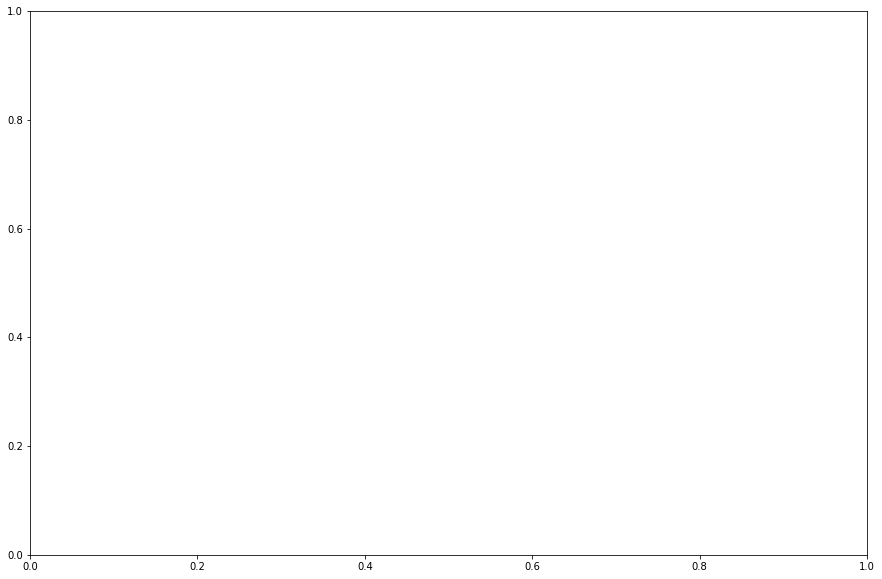

In [12]:
# Gràcies a aquest widget ens permet veure les gràfiques millor
#%matplotlib widget     

fig  = plt.figure(figsize=(15,10))               # Aquí es crea la instància de la immatge
# axes = plt.gca()

fig1 = fig.add_subplot(1,1,1)     # aquí li indiquem que n'hi haurà una

fig1.errorbar(x    = nominal_values(smallNozzleData1.mdot_s ) , y     = nominal_values(smallNozzleData1.P_vessel_dim),\
              xerr = std_devs(smallNozzleData1.mdot_s)        , yerr  = std_devs(smallNozzleData1.P_vessel_dim),\
              fmt  = 'r'                                      , label = "Experimental_LABSON", \
             color = "blue"
             )

fig1.errorbar( x   = nominal_values(smallNozzleData2.mdot_s) , y     = nominal_values(smallNozzleData2.P_vessel_dim),\
              xerr = std_devs(smallNozzleData2.mdot_s)       , yerr  = std_devs(smallNozzleData2.P_vessel_dim),\
              fmt  = 'sy'                                     ,label = "Experimental Small nozzle 2",
             )

fig1.errorbar( x   = nominal_values(largeNozzleData.mdot_s)  ,  y    = nominal_values(largeNozzleData.P_vessel_dim),\
              xerr = std_devs(largeNozzleData.mdot_s)        ,  yerr = std_devs(largeNozzleData.P_vessel_dim),\
              fmt  = 'o'                                     , label = "Experimental Large nozzle",
             color = "blue")

fig1.errorbar( x   = nominal_values(numData.mdot_s)          , y     = nominal_values(numData.p0_s_dim),\
              xerr = std_devs(numData.mdot_s)                , yerr  = std_devs(numData.p0_s_dim),\
              fmt  = 'v'                                     , label ="Numerical_HiSA",
             color = "g")

#fig1.errorbar( x   = nominal_values(numDataRCF.mdot_s)       , y     = nominal_values(numDataRCF.p0_s_dim), \
 #             xerr = std_devs(numDataRCF.mdot_s)             , yerr  = std_devs(numDataRCF.p0_s_dim),\
  #            fmt  = 'v'                                     , #label = "Numerical RCF",
   #          color = "Red")

fig1.set_xlabel("Adimensional aspiration flowrate")
fig1.set_ylabel("Adimensional vaccum level ")
plt.title(" CURVE OF PERFORMANCE \n" )
fig1.grid()                        # Ara ens mostrarà la graella
fig.savefig('curveofperformance.png')

# plt.xticks(np.arange(0.18, 0.4, 0.1))
# plt.yticks(np.arange(  min(nominal_value(largeNozzleData.QN_s)), max(nominal_value(largeNozzleData.QN_s)), 0.1))
# plt.xticks(np.arange(min(nominal_values(largeNozzleData.P_vessel_dim)), max(nominal_values(largeNozzleData.P_vessel_dim)), 0.1))

# plt.gca().invert_xaxis()   # Gràcies a aquesta comanda m'ha permes girar l'eix X i aconseguir veure-ho com ho vol veure el sergi
# fig1.set_xlabel('')


# axes.set_xlim([ 0 , 83 ])
# axes.set_ylim([ -2 , 450 ])

 